Simple linear regression

In [6]:
import numpy as np

# House sizes (sq. ft.) - x values
X = np.array([1000, 1500, 2000])  

# House prices (in $) - y values
Y = np.array([300000, 400000, 500000])

# Initial values of m (slope) and b (intercept)
m = 100
b = 50000  

# Number of data points
n = len(X)

# Step 1: Compute predictions
predictions = m * X + b 
print(predictions)

# Step 2: Compute errors (differences between predictions and actual values)
errors = predictions - Y  

# Step 3: Compute derivatives
dJ_dm = (2/n) * np.sum(X * errors)  # Derivative of m
dJ_db = (2/n) * np.sum(errors)       # Derivative of b

# Step 4: Update parameters using gradient descent
learning_rate = 0.000000001
m = m - learning_rate * dJ_dm
b = b - learning_rate * dJ_db

# Print results
print(f"Derivative of m: {dJ_dm}")
print(f"Derivative of b: {dJ_db}")
print(f"Updated m: {m}")
print(f"Updated b: {b}")


[279000 393500 508000]
Derivative of m: -9833333.333333332
Derivative of b: -13000.0
Updated m: 229.00983333333335
Updated b: 50000.000013


Iteration 0: Loss = 148649472.0, m = 100.63333333333334, b = 50000.0004
Iteration 100: Loss = 15917749934.315683, m = 150.70711730747928, b = 50000.032169934595
Iteration 200: Loss = 6147111102.3406515, m = 181.55265943607563, b = 50000.052005098056
Iteration 300: Loss = 2439561607.1762486, m = 200.5535695038595, b = 50000.064488420736
Iteration 400: Loss = 1032701368.7234755, m = 212.25816461040287, b = 50000.07244299608
Iteration 500: Loss = 498856644.62438625, m = 219.46821638792647, b = 50000.077607854764
Iteration 600: Loss = 296284858.0064711, m = 223.90962127400581, b = 50000.081054242946
Iteration 700: Loss = 219417319.8275415, m = 226.64553462326765, b = 50000.08344205007
Iteration 800: Loss = 190249295.51702106, m = 228.33086207400052, b = 50000.08517776942
Iteration 900: Loss = 179181245.16551045, m = 229.36902669433496, b = 50000.08651180139


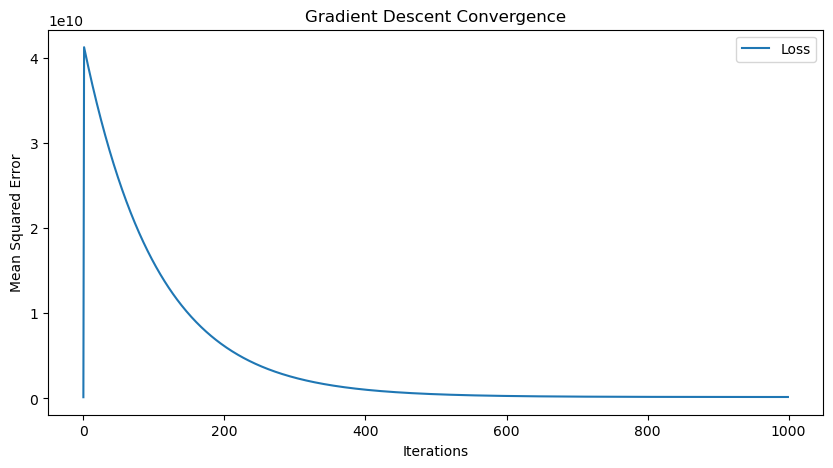

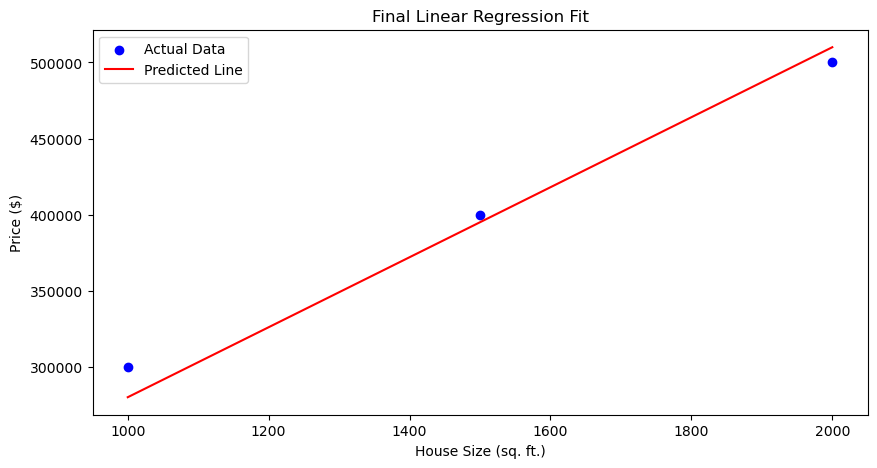

Final values after 1000 iterations: m = 230.0035552769309, b = 50000.08758840413


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# House sizes (sq. ft.) - x values
X = np.array([1000, 1500, 2000])  

# House prices (in $) - y values
Y = np.array([300000, 400000, 500000])

# Initialize parameters
m = 100  
b = 50000  
learning_rate = 0.000000001  
iterations = 1000  

# Store loss values for plotting
loss_history = []

# Gradient Descent Loop
for i in range(iterations):
    predictions = m * X + b  # Compute predictions
    errors = predictions - Y  # Compute errors
    
    dJ_dm = (2 / len(X)) * np.sum(X * errors)  # Derivative of m
    dJ_db = (2 / len(X)) * np.sum(errors)      # Derivative of b

    m = m - learning_rate * dJ_dm  # Update m
    b = b - learning_rate * dJ_db  # Update b

    # Compute and store loss (Mean Squared Error)
    loss = np.mean(errors**2)
    loss_history.append(loss)

    # Print every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Loss = {loss}, m = {m}, b = {b}")

# Plot Loss vs. Iterations
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

# Plot Final Model Fit
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color="blue", label="Actual Data")  # Actual data points
plt.plot(X, m * X + b, color="red", label="Predicted Line")  # Fitted line
plt.xlabel("House Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Final Linear Regression Fit")
plt.legend()
plt.show()

print(f"Final values after {iterations} iterations: m = {m}, b = {b}")


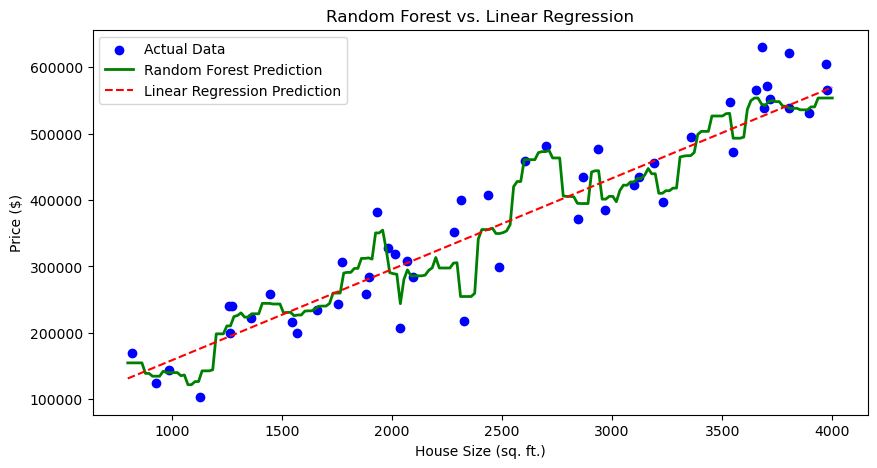

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic house size (sq. ft.) data
np.random.seed(42)
X = np.random.randint(800, 4000, 50).reshape(-1, 1)  # House sizes
y = X.flatten() * 150 + np.random.normal(0, 50000, 50)  # Prices with some noise

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train Linear Regression Model for comparison
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
X_range = np.linspace(800, 4000, 200).reshape(-1, 1)  # For smooth curve
rf_predictions = rf_model.predict(X_range)
lr_predictions = lr_model.predict(X_range)

# Plot Results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Actual Data')  # Actual data points
plt.plot(X_range, rf_predictions, color='green', label='Random Forest Prediction', linewidth=2)
plt.plot(X_range, lr_predictions, color='red', linestyle='dashed', label='Linear Regression Prediction')
plt.xlabel("House Size (sq. ft.)")
plt.ylabel("Price ($)")
plt.title("Random Forest vs. Linear Regression")
plt.legend()
plt.show()


**Parameters of random forest?**<br>
**max_depth** controls how deep each tree in the forest can grow. A deeper tree learns more details but may overfit the training data.
Simple Explanation
Imagine a Decision Tree as a series of yes/no questions.
Each time the tree splits into branches, it goes one level deeper.
The depth of the tree is the number of these splitting levels from the root to the last leaf node.
✅ Shallow trees (low max_depth) → Simpler, generalizes well.<br>
**Example of max_depth**
Suppose you are predicting house prices
Each split in the tree asks a question, like:
1️ Is the house bigger than 2000 sq. ft.?
2️ Is it in a good neighborhood?
3️ Does it have a swimming pool?
4️ Is it newly built?

If max_depth=2, the tree can only ask 2 questions before making a prediction.
If max_depth=5, the tree asks more questions, leading to a more precise (but possibly overfitting) model.

**min_samples_split** controls the minimum number of samples required to split a node in a decision tree.
Imagine predicting house prices with 100 data points.

If min_samples_split = 10, a node must have at least 10 houses before it can split.
If a node has only 9 houses, it stays as it is and does not split further.